In [2]:
# All Imports
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 3 - Sensitivity and condition number
---

### Preamble

Forward Error = Difference between computed and true value

Backward Error - Discrepancy in the input that would lead to the observed discrepancy in output

Condition number - Sensitivity of the output to changes in the input

A high condition number is bad because it means that small changes in the input can lead to large changes in the output. This is bad because it means that the output is not stable and can be very different from the true value.


### Measuring Sensitivity of function $f(x) = cos(2 \pi x)$

In [15]:
func_real = lambda x: np.cos(2 * np.pi * x)

def truncated_taylor_cos(x: int, n: int=10, truncate_after_first_nonzero=True) -> np.ndarray:
    """Taylor series expansion of cos(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    total = 0
    for i in range(n):
        if truncate_after_first_nonzero and total != 0:
            return total
        total += np.sum((-1)**i * (x**(2*i) / math.factorial(2*i)))
    return total

#### Method 1: Computing ratio between backward and forward error

$$
\begin{align*}
\text{Forward Error:  } 
& |\Delta y| = | \widetilde{y} - y | \\

\text{Backward Error:  } 
& |\Delta x| = | \widetilde{x} - x |
\end{align*}

\\

\text{Condition Number} = 

\frac{|\frac{\Delta y}{y}|}{|\frac{\Delta x}{x}|} = \frac{\text{Relative forward error}}{\text{Relative backward error}}
$$


##### Sources of error

1. Truncating taylor series expansion of cos function after the first non 0 term. In every case this is equal to 1
2. The input x is rounded to 3 significant figures. This just means that the domain will have increments of $0.001$ because this is the smallest decimal fraction up to 3 decimal places.

In [4]:
def forward_error(real_function, estimated_function, domain):
    return abs(real_function(domain) - estimated_function(domain))

def sensitivity_method_1(real_function, estimated_function, domain):
    return abs(forward_error(real_function, estimated_function, domain) / domain)

#### Method 2: Using approximation formula

##### Formula for Condition number

$$
\text{Condition number} = |\frac{x*f'(x)}{f(x)}|
$$

##### Derving Condition number for $f(x)=cos(2 \pi x)$

###### Derivative of the function
$$
\begin{align*}
& f(x) = cos(2 \pi x) \\

& \text{Using chain rule} \\
& f'(x) = -sin(2 \pi x) * \frac{d}{dx} (2 \pi x) \\
& f'(x) =  -sin(2 \pi x) * 2 \pi \\
& f'(x) =  - 2 \pi sin(2 \pi x) \\
\end{align*}
$$

###### Calculating condition number

$$
\begin{gather}
    \text{Condition number} = \frac{x * -2 \pi sin(2 \pi x)}{cos(2 \pi x)} \\ 
    \text{Condition number} = -2 \pi x * tan(2 \pi x)
\end{gather}
$$

Although simplified to tan, I will be using equation (1) to introduce truncation error for the function 

In [5]:
def sensitivity_method_2(domain):
    numberator = domain * -np.sin(2 * np.pi * domain) # cos function doesnt need to be approximated
    # per the specifications, only the cosine function is approximated using the taylor series till the first non 0 term
    denominator = truncated_taylor_cos(domain)
    return numberator / denominator

Since we are approximating the value of cos x using the taylor/maclaurin expansion up to the first non zero term (which is 1 in every case), we are approximating $cos(k) = -2 \pi * sin (k)$ where $k=2 \pi x$. Additionally, I also know that the truncated cos expansion can be represented by $cos(k) = 1$ which is the first non zero term in the expansion.
$$
cos(k) = -2 \pi * sin(k) \\
cos(k) = 1 \\
-2 \pi x * sin(k) = 1 \\
-k * sin(k) = 1 \\

f(k) = -k * sin(k) - 1 \\


sin(x) = 1 \rightarrow x = 2n \pi + \frac{\pi}{2} \\


cos(x) = 1 \rightarrow x = 2n \pi \\

$$

In [6]:
domain = np.arange(-2, 2, 0.001)

In [21]:
dom = np.arange(-100, 100, 4*np.pi + np.pi/2)
real = [func_real(x) for x in dom]
approx = [truncated_taylor_cos(x) for x in dom]
print("Real: ", real)
print("Approx: ", approx)

Real:  [1.0, 0.6510379042073091, -0.1522992945707131, -0.8493431313064456, -0.9536098497465252, -0.3923291847144243, 0.44276750939485393, 0.9688460474494501, 0.8187434910672109, 0.0972200455660944, -0.6921556216426331, -0.9984591361651507, -0.6079138652485978, 0.20690919862523907, 0.8773253273168308]
Approx:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[16775, 34787, 48624]


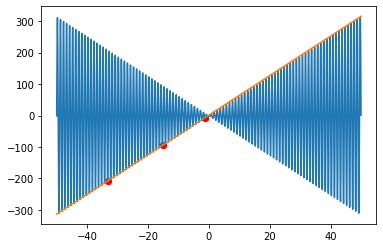

In [ ]:
k = lambda x: 2 * np.pi * x
func = lambda x: -k(x) * np.sin(k(x)) - 1
func_range = [func(x) for x in domain]

sinx_1 = lambda n: 2 * np.pi * n + (np.pi/2)
sinx_1_range = [sinx_1(x) for x in domain]

difference = [abs(func_range[i] - sinx_1_range[i]) for i in range(len(domain))]
tolerated = [True if difference < 0.001 else False for difference in difference]
tolerated_index = [i for i in range(len(tolerated)) if tolerated[i]]
print(tolerated_index)

plt.plot(domain, func_range, label='f(x)')
plt.plot(domain, sinx_1_range, label='f\'(x)')

# scatter plot of the tolerated values
tolerated_domain = [domain[i] for i in tolerated_index]
tolerated_func_range = [func_range[i] for i in tolerated_index]
tolerated_sinx_1_range = [sinx_1_range[i] for i in tolerated_index]
plt.scatter(tolerated_domain, tolerated_func_range, color='red')
plt.scatter(tolerated_domain, tolerated_sinx_1_range, color='red')

(-2.0, 2.0)

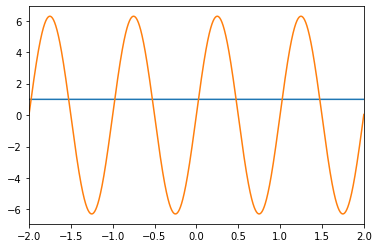

In [ ]:
cos_k = [truncated_taylor_cos(x) for x in domain]
sin_k = [2 * np.pi * np.sin(2 * np.pi * x) for x in domain]

difference = [abs(cos_k[i] - sin_k[i]) for i in range(len(domain))]
tolerated = [True if difference < 0.01 else False for difference in difference]
tolerated_index = [i for i in range(len(tolerated)) if tolerated[i]]


plt.plot(domain, cos_k, label='arctan(x)')
plt.plot(domain, sin_k, label='sin(x)')
plt.scatter(tolerated_domain, tolerated_sink, color='red')
plt.xlim(-2, 2)

### Comparing the two methods

The following graph shows how both the methods compare to each other. We can see that method 1 is more accurate than method 2 for larger values of x. This is because of a few reasons.

1. Calculating the ratio of forward and backward error is the direct way to calculate condition number
2. The approximation formula for condition number calculates the number in terms of the function and its derivative.
3. The actual function is 

#### Real function vs approximation

As shown in the graph below, the approximation formula only returns the value 1 because of the provided "sources of error". This being the case, the approximation is more accurately modelling the function $f(x) = 1$ rather than $f(x) = cos(2 \pi x)$, however, these functions do intersect at certain domain values i.e. for certain values of x the function $f(x) = cos(2 \pi x)$ and $f(x) = 1$ will have the same value. Essentially the approximation is "very bad".

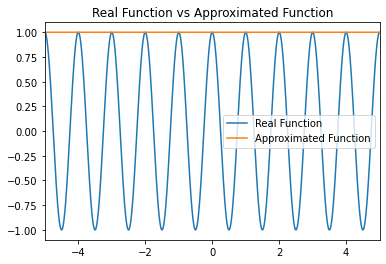

In [ ]:
tolerance = 0.001
dom = 50
domain = np.arange(-dom, dom, tolerance)
# plot the graph
real_range = [func_real(domain) for domain in domain]
approx_range = [truncated_taylor_cos(2 * np.pi * domain) for domain in domain]

plt.title("Real Function vs Approximated Function")
plt.plot(domain, real_range, label="Real Function")
plt.plot(domain, approx_range, label="Approximated Function")
plt.xlim(-5, 5)
plt.legend()
plt.show()

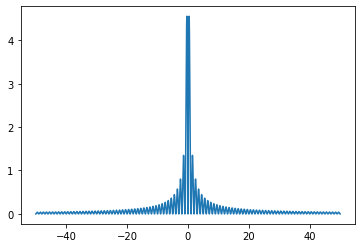

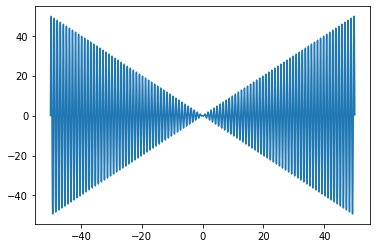

In [ ]:
method1 = [sensitivity_method_1(func_real, truncated_taylor_cos, domain) for domain in domain]
method2 = [sensitivity_method_2(domain) for domain in domain]
# difference = [abs(method1[i] - method2[i]) for i in range(len(method1))]

# plt.title("Sensitivity Methods")
plt.plot(domain, method1, label="Sensitivity Method 1")
plt.show()

plt.plot(domain, method2, label="Sensitivity Method 2")
# plt.legend()
plt.show()

In [ ]:
difference = [abs(method1[i] - method2[i]) for i in range(len(method1))]
# find the points where difference is less than tolerance
points = [domain[i] for i in range(len(difference)) if difference[i] < tolerance]
print(points)
value_method1 = [sensitivity_method_1(func_real, truncated_taylor_cos, point) for point in points]
value_method2 = [sensitivity_method_2(point) for point in points]
print(value_method1)
print(value_method2)

[-50.0, -49.00000000000233, -48.00000000000466, -47.00000000000699, -46.00000000000932, -45.00000000001165, -44.00000000001398, -43.000000000016314, -42.000000000018645, -41.000000000020975, -40.000000000023306, -39.000000000025636, -38.00000000002797, -37.0000000000303, -36.00000000003263, -35.00000000003496, -34.00000000003729, -33.00000000003962, -32.00000000004195, -31.00000000004428, -30.00000000004661, -29.000000000048942, -28.000000000051273, -27.000000000053603, -26.000000000055934, -25.000000000058265, -24.000000000060595, -23.000000000062926, -22.000000000065256, -21.000000000067587, -20.000000000069917, -19.000000000072248, -18.00000000007458, -17.00000000007691, -16.00000000007924, -15.00000000008157, -14.0000000000839, -13.000000000086231, -12.000000000088562, -11.000000000090893, -10.000000000093223, -9.000000000095554, -8.000000000097884, -7.000000000100215, -6.0000000001025455, -5.000000000104876, -4.000000000107207, -3.0000000001095373, -2.000000000111868, -1.000000000